In [ ]:
class Node:
  
    def __init__(self, data, indexloc = None):
        self.data = data
        self.index = indexloc
    
#     def default(self):
#         self.data = 'default'
#         self.index = None

# class Path:
    
#     def __init__(self, nodes):
#         self.nodes = nodes
#         self.str = ''.join([node.data for node in nodes])
    
#     def __eq__(self, obj):
#         return self.str == obj.str
        
class Graph:

    @classmethod
    def create_from_nodes(self, nodes):
        return Graph(len(nodes), len(nodes), nodes)

  
    def __init__(self, row, col, nodes = None):
        # установка матрица смежности
        self.adj_mat = [[0] * col for _ in range(row)]
        self.nodes = nodes
        for i in range(len(self.nodes)):
            self.nodes[i].index = i

    # Связывает node1 с node2
    # Обратите внимание, что ряд - источник, а столбец - назначение 
    # Обновлен для поддержки взвешенных ребер (поддержка алгоритма Дейкстры)
    def connect_dir(self, node1, node2, weight = 1):
        node1, node2 = self.get_index_from_node(node1), self.get_index_from_node(node2)
        self.adj_mat[node1][node2] = weight
  
    # Опциональный весовой аргумент для поддержки алгоритма Дейкстры
    def connect(self, node1, node2, weight = 1):
        self.connect_dir(node1, node2, weight)
        self.connect_dir(node2, node1, weight)

    # Получает ряд узла, отметить ненулевые объекты с их узлами в массиве self.nodes
    # Выбирает любые ненулевые элементы, оставляя массив узлов
    # которые являются connections_to (для ориентированного графа)
    # Возвращает значение: массив кортежей (узел, вес)
    def connections_from(self, node):
        node = self.get_index_from_node(node)
        return [(self.nodes[col_num], self.adj_mat[node][col_num]) for col_num in range(len(self.adj_mat[node])) if self.adj_mat[node][col_num] != 0]

    # Проводит матрицу к столбцу узлов
    # Проводит любые ненулевые элементы узлу данного индекса ряда
    # Выбирает только ненулевые элементы
    # Обратите внимание, что для неориентированного графа
    # используется connections_to ИЛИ connections_from
    # Возвращает значение: массив кортежей (узел, вес)
    def connections_to(self, node):
        node = self.get_index_from_node(node)
        column = [row[node] for row in self.adj_mat]
        return [(self.nodes[row_num], column[row_num]) for row_num in range(len(column)) if column[row_num] != 0]
     
  
    def print_adj_mat(self):
        for row in self.adj_mat:
            print(row)
  
    def node(self, index):
        return self.nodes[index]
    
  
    def remove_conn(self, node1, node2):
        self.remove_conn_dir(node1, node2)
        self.remove_conn_dir(node2, node1)
   
    # Убирает связь в направленной манере (nod1 к node2)
    # Может принять номер индекса ИЛИ объект узла
    def remove_conn_dir(self, node1, node2):
        node1, node2 = self.get_index_from_node(node1), self.get_index_from_node(node2)
        self.adj_mat[node1][node2] = 0   
  
    # Может пройти от node1 к node2
    def can_traverse_dir(self, node1, node2):
        node1, node2 = self.get_index_from_node(node1), self.get_index_from_node(node2)
        return self.adj_mat[node1][node2] != 0  
  
    def has_conn(self, node1, node2):
        return self.can_traverse_dir(node1, node2) or self.can_traverse_dir(node2, node1)
  
    def add_node(self,node):
        self.nodes.append(node)
        node.index = len(self.nodes) - 1
        for row in self.adj_mat:
            row.append(0)     
        self.adj_mat.append([0] * (len(self.adj_mat) + 1))

    # Получает вес, представленный перемещением от n1
    # к n2. Принимает номера индексов ИЛИ объекты узлов
    def get_weight(self, n1, n2):
        node1, node2 = self.get_index_from_node(n1), self.get_index_from_node(n2)
        return self.adj_mat[node1][node2]
  
    # Разрешает проводить узлы ИЛИ индексы узлов  
    def get_index_from_node(self, node):
        if not isinstance(node, Node) and not isinstance(node, int):
            raise ValueError("node must be an integer or a Node object")
        if isinstance(node, int):
            return node
        else:
            return node.index
        
    def dijkstra(self, node):
        P = set()
        L = [Node('default') for i in range(len(self.nodes))]
        D = [float("inf") for i in range(len(self.nodes))]
        
        R = [[] for i in range(len(self.nodes))]
        C = [[] for i in range(len(self.nodes))]
        S = [[] for i in range(len(self.nodes))]
        Z = [[] for i in range(len(self.nodes))]
          
    # Получает индекс узла (или поддерживает передачу int)
        nodenum = self.get_index_from_node(node)
    # Заставляет массив отслеживать расстояние от одного до любого узла
    # в self.nodes. Инициализирует до бесконечности для всех узлов, кроме 
    # начального узла, сохраняет "путь", связанный с расстоянием. 
    # Индекс 0 = расстояние, индекс 1 = перескоки узла
        
        D[nodenum] = 0
        L[nodenum] = node
        
    
        # Добавляет в очередь все узлы графа
        # Отмечает целые числа в очереди, соответствующие индексам узла
        # локаций в массиве self.nodes 
        queue = [i for i in range(len(self.nodes))]
        # Набор увиденных на данный момент номеров 
        
        
        def f(curNode):
            if curNode.index == 0:
                return curNode.data 
            else:
                return f(L[curNode.index]) + curNode.data
            
            
        
        while len(queue) > 0:
            # Получает узел в очереди, который еще не был рассмотрен
           # и который находится на кратчайшем расстоянии от источника
            min_dist = float("inf")
            min_node = None
            for n in queue: 
                if D[n] < min_dist and n not in P:
                    min_dist = D[n]
                    min_node = n
            
            # Добавляет мин. расстояние узла до увиденного, убирает очередь
            
            queue.remove(min_node)
            P.add(self.nodes[min_node])

                    
        # Получает все следующие перескоки        
            connections = self.connections_from(min_node)
            potential_vert = self.connections_to(min_node)
        # Для каждой связи обновляет путь и полное расстояние от  
        # исходного узла, если полное расстояние меньше
        # чем текущее расстояние в массиве dist
            for (node, weight) in connections: 
                tot_dist = weight + min_dist
                if tot_dist < D[node.index]:
                    D[node.index] = tot_dist #14
                    L[node.index] = self.nodes[min_node] #15
                    
            for (node, weight) in potential_vert:
                if node not in R[min_node]:
                    R[min_node].append(node)
                    C[min_node].append(weight)  
            
            #checking straight paths with {VERT : VERT IN P}  
            #TODO
            for i in range(len(R[min_node])):
                if (R[min_node][i] in P) and (L[min_node] != R[min_node][i]):
                    Z[min_node].append(f(R[min_node][i]) + self.nodes[min_node].data)
                    S[min_node].append(D[R[min_node][i].index] + C[min_node][i])
                    
            #checking reserve paths with {VERT : V(VERT, U1) < inf}
            #TODO
            for i in range(len(R[min_node])):
                indNotInf = R[min_node][i].index
                if D[indNotInf] < float("inf"):
                    for j in range(len(Z[indNotInf])):
                        path = Z[indNotInf][j]
                        if self.nodes[min_node].data not in path:
                            Z[min_node].append(path + self.nodes[min_node].data)
                            S[min_node].append(S[indNotInf][j] + C[min_node][i])
            
            
            #self.nodes[min_node] as Reserve path for any vert-s
            #TODO
            path = f(self.nodes[min_node])
            W = False
            for i in range(len(R)):
                if self.nodes[min_node] in R[i]:
                    #straight + reserve_edge
#                     if (path == 'UKB'):
#                         W = True
                    if self.nodes[i].data not in path:
                        Z[i].append(path + self.nodes[i].data)
                        S[i].append(D[min_node] + C[i][R[i].index(self.nodes[min_node])])
            
#                     if W:
#                         print(Z[min_node])
                    for t in range(len(Z[min_node])):
                        path_tmp = Z[min_node][t]
#                         if (path_tmp == 'UEKB'):
#                             print('HELLO!B')
                        if self.nodes[i].data not in path_tmp:
                            Z[i].append(path_tmp + self.nodes[i].data)
                            S[i].append(D[min_node] + S[min_node][t])
                    
                    ##TODO
#                     print(self.nodes[i].data)
                    def update(mainNode):
                        upd_ver = self.connections_from(mainNode)
                        for (node, weight) in upd_ver:
                            paths = Z[mainNode.index]
                            for path in paths:
                                flag = False
                                if (node.data not in path) and ((path + node.data) not in Z[node.index]):
                                    flag = True
                                    Z[node.index].append(path + node.data)
                                    S[node.index].append(S[mainNode.index][paths.index(path)] + weight)
                                if flag:
                                    update(node)
                                    
                    upd_vert = self.connections_from(self.nodes[i])
                    update(self.nodes[i])
                    
                                    
                    
                            
                            
                
                
        L = [f(L[i]) + self.nodes[i].data for i in range(len(L))]
        
        new_Z = [[] for k in range(len(Z))]
        new_S = [[] for k in range(len(Z))]
        
        for qw in range(len(Z)):
            for we in range(len(Z[qw])):
                if Z[qw][we] not in new_Z[qw]:
                    new_Z[qw].append(Z[qw][we])
                    new_S[qw].append(S[qw][we])
                    
        
        return (D, L, new_Z, new_S)

In [ ]:
qwe = [a, b, c, d, e, f]

for i in range(len(g[0])):
    print(f'Main: {qwe[i].data}', g[0][i], g[1][i])
    print('\t');
    for j in range(len(g[2][i])):
#         print(f'way {j+1}', [n.data for n in c[2][i][j]], 'length: ', c[3][i][j])
        print(f'way {j+1}', 'Path:',f"'{g[2][i][j]}'", 'length: ', g[3][i][j])

Main: A 0 AA
	
Main: B 5 AB
	
Main: C 7 ABC
	
way 1 Path: 'AC' length:  10
way 2 Path: 'ABDC' length:  16
Main: D 9 ABD
	
Main: E 2 AE
	
way 1 Path: 'ABDE' length:  12
Main: F 17 ABCF
	
way 1 Path: 'ACF' length:  20
way 2 Path: 'ABDCF' length:  26


In [ ]:
#test

u = Node("U")
k = Node("K")
e = Node("E")
a = Node("A")
b = Node("B")
d = Node("D")
# c = Node("C")

w_graph = Graph.create_from_nodes([u, k, e, a, b, d])


w_graph.connect_dir(u,k,4)
w_graph.connect_dir(u,e,16)
w_graph.connect_dir(u,a,1)
w_graph.connect_dir(k,b,21)
w_graph.connect_dir(e,k,2)
w_graph.connect_dir(e,d,14)
w_graph.connect_dir(a,e,2)
w_graph.connect_dir(a,k,10)
w_graph.connect_dir(b,a,3)
w_graph.connect_dir(d,a,7)
#w_graph.connect_dir(c,a,3)

w_graph.print_adj_mat()

c = w_graph.dijkstra(u)

[0, 4, 16, 1, 0, 0]
[0, 0, 0, 0, 21, 0]
[0, 2, 0, 0, 0, 14]
[0, 10, 2, 0, 0, 0]
[0, 0, 0, 3, 0, 0]
[0, 0, 0, 7, 0, 0]


### Смотреть от сюда!
## Внизу график

In [ ]:
from random import randint
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

#отображение графиков в ноутбуке
%matplotlib inline 

#для четкой прорисовки графиков
%config InlineBackend.figure_format = 'svg'

def ways_and_vert(qwe, c):
# Формирование списка путей и списка вершин
    all_ways = {}
    vertexes = []
    for i in range(len(c[0])):
        j_ways=[]
        for j in range(len(c[2][i])):
            j_ways.append([c[2][i][j], c[3][i][j]])
        j_ways = sorted(j_ways, reverse=False, key=lambda x: x[1])
        all_ways.update({qwe[i].data: j_ways})
        vertexes.append(qwe[i].data)
    return all_ways, vertexes

def ed (vertexes):
    # Выделение всех возможных рёбер
    edjes = []
    for i in vertexes:
        for j in vertexes:
            if i!=j:
                edjes.append(i+j)
    return edjes

def random_list(ref, length):
    # Вспомогательная функция для выбора вершин
    rand_list=[]
    while(length>0):
        rand = randint(0, ref-1)
        while(rand in rand_list): 
            rand = randint(0, ref-1)
        rand_list.append(rand)
        length -= 1
    return rand_list

def not_work_edjes(edjes, rand_list):
    # Не работющие каналы связи
    not_work = []
    for i in rand_list:
        not_work.append(edjes[i])
    return not_work

def split_way(way):
    sp = []
    for j in range(len(way)-1):
        sp.append(way[j:j+2])
    return sp

def check_work(a,b):
    a = split_way(a)
    for i in a:
        if i in b:
            return False
    return True

def sum2(a):
    sum = 1
    a-=1
    while (a>1):
        sum+=a
        a-=1
    return sum*2

def count_time(qwe, not_work = None, unwork=0, nf=30):
    sum = -nf
    all_ways, vertexes = ways_and_vert(qwe,c)
    edjes = ed(vertexes)
    if not_work is None:
        not_work = not_work_edjes(edjes, random_list(sum2(len(vertexes)),unwork))
    #print(not_work, '\n')
    #print(all_ways)
    for i in vertexes:
        ways = all_ways[i]
        flag=True
        j = 0
        while (j < len(ways) and flag):
            if check_work(ways[j][0], not_work):
                flag = False
            else:
                j+=1
            #print(j, flag)
        if flag:
            #print('Not_found')
            sum+=nf
        else:
            #print(ways[j])
            sum+=ways[j][1]
    return sum

def for_plot_time(qwe, m=20, n=300, nf=30):
    times = []
    for i in range(m):
        sum=0
        for j in range(n):
            sum += count_time(qwe, unwork = i, nf=nf)/n
        times.append([i, sum])
    return(np.array(times))

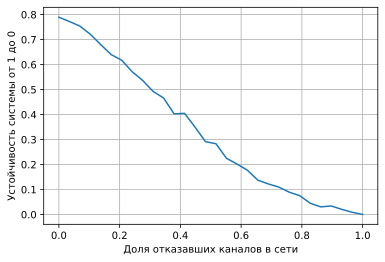

In [ ]:

qwe = [u, k, e, a, b, d]
times = for_plot_time(qwe,30,300, 100)
#print(times[:,1]/times[29,1])
#print(np.ones([1,30]))
y = np.ones([30]) - (times[:,1]/times[-1,1]).reshape([30])
x = (times[:,0]/times[-1,0]).reshape([30])
sns.lineplot(x=x, y=y, ci="sd")
plt.xlabel("Доля отказавших каналов в сети")
plt.ylabel("Устойчивость системы от 1 до 0")
plt.grid(True)
plt.show()